In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import dhlab as dh
import matplotlib.pyplot as plt

In [2]:
corpus = pd.read_csv('corpus_konsensus.csv', index_col = 0)

In [3]:
corpus['dhlabid'] = corpus.dhlabid.astype(int)

In [4]:
title_dict = corpus[['dhlabid','title']].set_index('dhlabid').to_dict()

# Konsensu

In [5]:
kons = pd.read_csv("urn_to_romance.csv", index_col=0)

In [6]:
kons

,counts,tag
urn,,
URN:NBN:no-nb_digibok_2011111605037,Counter({'x': 1}),x-1
URN:NBN:no-nb_digibok_2007082703001,"Counter({'z': 1, 'x': 1})",z-1#x-1
URN:NBN:no-nb_digibok_2009100812001,Counter({'x': 1}),x-1
URN:NBN:no-nb_digibok_2013110424054,Counter({'x': 1}),x-1
NaN,Counter({'x': 1}),x-1
...,...,...
URN:NBN:no-nb_digibok_2021082548053,Counter({'x': 1}),x-1
URN:NBN:no-nb_digibok_2021082548053,Counter({'x': 1}),x-1
URN:NBN:no-nb_digibok_2011062708033,Counter({'x': 1}),x-1


In [7]:
from collections import Counter

In [8]:
#eval(kons.iloc[0]['counts'])

In [9]:
#kons['tag'] = kons['counts'].apply(lambda C: '#'.join([f"{x}-{str(eval(C)[x])}" for x in eval(C)]))

In [10]:
urn2tag = kons.reset_index().dropna(how='any', axis=0).set_index('urn').to_dict()['tag']

In [11]:
dhlab2urn = corpus[['dhlabid', 'urn']].set_index('dhlabid').to_dict()['urn']

In [12]:
dhlab2tag = {x:urn2tag.get(dhlab2urn[x]) for x in dhlab2urn}

# Analyse

In [13]:
counts = dh.Counts(corpus)

In [14]:
df = counts.frame.rename(columns=title_dict['title'])

In [15]:
df = counts.frame.rename(columns=dhlab2tag)

In [16]:
dft = df.transpose()*100/df.transpose().sum()

In [17]:
df = dft.transpose()

In [18]:
df

,x-1,x-1,x-1,x-2,x-3,x-1,z-1#x-1,x-1,x-1,x-1,...,x-1#x/y-1,x-1,w-1#x-1,x-1,x-1,x-1,x-1,x-2,x-1,x-1
",",0.403018,0.601782,1.040023,0.700973,0.071287,0.109179,0.276531,0.348962,0.352011,3.021641,...,0.681455,0.114364,0.787356,0.329215,0.324945,0.040790,1.837672,1.518750,0.362914,0.846215
.,0.226528,0.369073,0.898391,0.392799,0.037849,0.059880,0.202237,0.147629,0.475934,1.898277,...,0.372368,0.117971,0.487233,0.183877,0.179829,0.029281,1.386753,1.160320,0.447972,0.572534
og,0.655204,1.090994,1.391825,1.156956,0.047195,0.097977,0.423647,0.360721,0.249496,4.417796,...,0.772224,0.051610,1.062567,0.565783,0.523556,0.093285,2.185301,2.712444,0.802859,0.828250
i,0.484976,0.865846,1.729516,1.108516,0.061665,0.101566,0.269149,0.321382,0.247022,4.484482,...,0.621364,0.060939,1.261227,0.471192,0.305059,0.039175,2.336733,2.784710,0.716763,1.139348
!,1.821479,0.056773,0.244441,0.257057,0.250749,0.253903,0.996688,1.062924,4.223309,0.607160,...,4.081375,0.006308,0.228671,0.247595,0.143510,0.009462,2.772433,0.540924,0.195553,0.203438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
á,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
þá,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
ÆLDSTE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000
UDSEENDE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000


In [23]:
# Initialize PCA and set number of components to 5
pca = PCA(n_components=5)
X = df.values.T  # Take transpose to make the books as rows
X_pca = pca.fit_transform(X)

Explained variance by each component: [0.15826844 0.11616529 0.10075428 0.05581462 0.03498176]


Text(0, 0.5, 'Dimension 1 Principal Component')

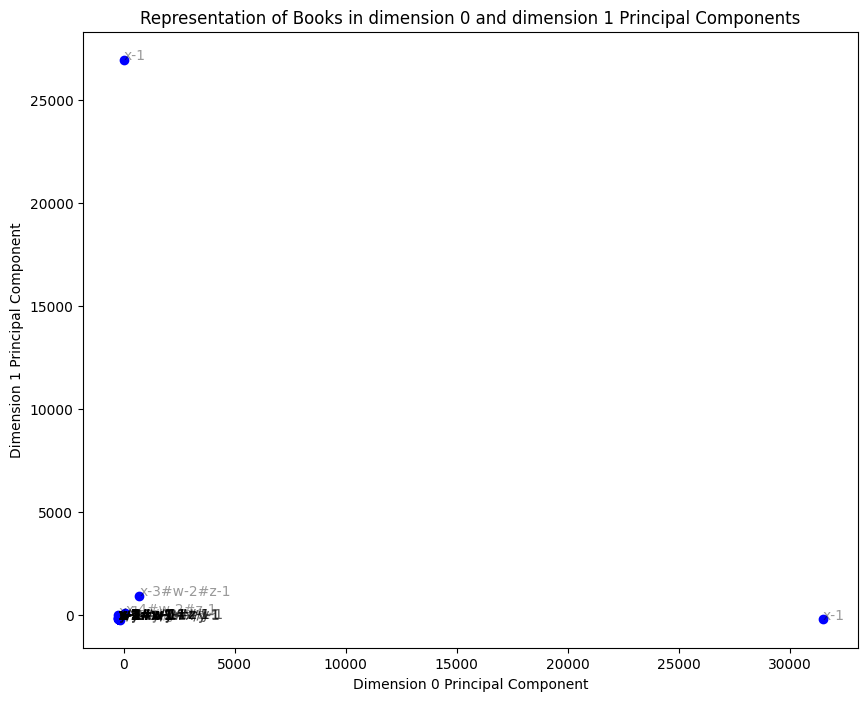

In [24]:
## Explained variance
print("Explained variance by each component:", pca.explained_variance_ratio_)

dim1 = 0
dim2 = 1

# Plotting dimensions 2 and 3
x = X_pca[:, dim1]  # Second principal component
y = X_pca[:, dim2]  # Third principal component

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, c='blue')

# Label the points
for i, txt in enumerate(df.columns):
    plt.annotate(txt, (x[i], y[i]), alpha=0.4)

# Add title and axis labels
plt.title(f'Representation of Books in dimension {dim1} and dimension {dim2} Principal Components')
plt.xlabel(f'Dimension {dim1} Principal Component')
plt.ylabel(f'Dimension {dim2} Principal Component')



In [25]:
## Krasjer ser det ut som....

from sklearn.metrics.pairwise import cosine_similarity

dtm = df.head(500)

In [26]:
dtm.columns = [f"{col} {i}" for i, col in enumerate(dtm.columns)]

In [27]:
dtm

,x-1 0,x-1 1,x-1 2,x-2 3,x-3 4,x-1 5,z-1#x-1 6,x-1 7,x-1 8,x-1 9,...,x-1#x/y-1 143,x-1 144,w-1#x-1 145,x-1 146,x-1 147,x-1 148,x-1 149,x-2 150,x-1 151,x-1 152
",",0.403018,0.601782,1.040023,0.700973,0.071287,0.109179,0.276531,0.348962,0.352011,3.021641,...,0.681455,0.114364,0.787356,0.329215,0.324945,0.040790,1.837672,1.518750,0.362914,0.846215
.,0.226528,0.369073,0.898391,0.392799,0.037849,0.059880,0.202237,0.147629,0.475934,1.898277,...,0.372368,0.117971,0.487233,0.183877,0.179829,0.029281,1.386753,1.160320,0.447972,0.572534
og,0.655204,1.090994,1.391825,1.156956,0.047195,0.097977,0.423647,0.360721,0.249496,4.417796,...,0.772224,0.051610,1.062567,0.565783,0.523556,0.093285,2.185301,2.712444,0.802859,0.828250
i,0.484976,0.865846,1.729516,1.108516,0.061665,0.101566,0.269149,0.321382,0.247022,4.484482,...,0.621364,0.060939,1.261227,0.471192,0.305059,0.039175,2.336733,2.784710,0.716763,1.139348
!,1.821479,0.056773,0.244441,0.257057,0.250749,0.253903,0.996688,1.062924,4.223309,0.607160,...,4.081375,0.006308,0.228671,0.247595,0.143510,0.009462,2.772433,0.540924,0.195553,0.203438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ifra,6.896552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.327586,0.862069,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.431034,0.000000,0.862069,0.862069,0.000000,0.000000
hvo,2.527646,0.000000,0.473934,0.000000,0.000000,0.000000,0.947867,0.157978,2.211690,3.159558,...,0.473934,0.000000,0.631912,1.263823,0.000000,0.000000,5.845182,0.473934,0.000000,0.631912
sige,0.320577,1.041875,0.581046,1.382488,0.060108,0.160289,0.561010,0.120216,0.340613,1.442597,...,0.601082,0.020036,1.442597,0.240433,0.701262,0.000000,3.105590,2.324184,0.100180,0.520938
givet,0.880572,0.660429,1.375894,1.375894,0.220143,0.110072,0.495322,0.495322,0.385250,7.705008,...,0.660429,0.000000,1.761145,0.275179,0.220143,0.000000,2.201431,1.430930,0.000000,0.825537


In [28]:
# Compute cosine similarity between all document pairs
cosine_sim = cosine_similarity(dtm.transpose())



In [29]:
cos_df = pd.DataFrame(cosine_sim, index=dtm.columns, columns=dtm.columns)


In [30]:
cos_df.sort_values(by=cos_df.columns[3], ascending=False).style.background_gradient()

In [31]:
cos_df[cos_df.columns[17]].sort_values(ascending=False).head(50)

x-4#w-2#z-1 17       1.000000
x-3#w-2#z-1 110      0.950985
x-1 124              0.625558
x-4#w-2#z-1 55       0.595500
x-1 86               0.560603
x-2#w-2#z-1 74       0.548163
x-1 52               0.515837
x-3 90               0.507053
x-1 22               0.475641
x-4#w-2#z-1 99       0.449932
x-1 77               0.446332
x-1 31               0.438473
x-2 21               0.433543
x-1 152              0.420342
x-2 24               0.420228
x-5#y-1#x/y-1 129    0.412549
y-2#x-1#x/y-1 49     0.393476
x-1 65               0.392983
x-1 1                0.389623
x-1 33               0.385700
None 53              0.384876
x-1 2                0.384490
x-2 3                0.383650
x-1 103              0.382480
x-1 91               0.381739
x-1 134              0.374944
w-1 26               0.373863
x-1#x/y-1 95         0.369747
x-1 38               0.364334
x-1 54               0.359971
x-2#w-1 133          0.359930
x/y-1 108            0.356629
w-1#x-1 145          0.355196
x-1 120   